In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

#### What is Linear Regression?<br>
Linear Regression is a predictive algorithm which provides a Linear relationship between <b>Prediction</b> (Call it ‘Y’) and <b>Input</b> (Call is ‘X’).<br>
As we know from the basic maths that if we plot an ‘X’,’Y’ graph, a linear relationship will always come up with a straight line. For example, if we plot the graph of these values<br>
(Input) X = 1,2,3,4,5<br>
(Prediction) Y = 1,2,3,4,5<br>
It will be a perfectly straight line:<br><br>
<center><img src="https://miro.medium.com/max/720/1*FIXuLEmOf90Hwy_GEdZftQ.jpeg"><br><h6>Linear Straight Line graph</h6><p></center>

This is a simple dataset containing housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house. You might have noticed that we have more than one feature in our dataset (i.e. the house_size(in sqft) and the number of rooms) hence we will be looking at multivariate linear regression and the label (y) will be the house price as that is what we are going to be predicting.
Lets define the function for loading the dataset:

In [2]:
def load_data(filename):
    df = pd.read_csv(filename, sep=",", index_col=False)
    df.columns = ["housesize", "rooms", "price"]
    data = np.array(df, dtype=float)
    plot_data(data[:,:2], data[:, -1])
    normalize(data)
    return data[:,:2], data[:, -1]

We will be calling the above function later to load the dataset. This function returns x and y (note x is made up of the first 2 columns of the dataset whereas y is the last column of the dataset as that is the price column hence in order to return x and y we are returning data[:,:2] and data[:,-1] respectively from the function).<br>
### Normalize the data
The above code not only loads the data but also normalizes it and plots the data points. We will look at the plot of the data in a bit but first lets understand what the normalize(data) line is doing above. If you look at the raw dataset you will notice that the values in the second column (i.e. the number of rooms) are much smaller than the those in the first (i.e house size). Our model does not evaluate this data as number of rooms or size of house. For the model its all just numbers. This can create an unwanted bias in your machine learning model towards the columns (or features) that have higher numerical values than the others. It can also create imbalance in the variance and mathematical mean. For these reasons and also to make the job easier it is always advised to scale or normalize your features so that they all lie within the same range ( e.g. [-1 to 1] or [0 to 1] ). This makes training much easier. So for our purpose here we will be using feature normalization which in the mathematical sense means:<br>
<h5>Z = (x — μ) / σ</h5>
<h5>μ : mean</h5>
<h5>σ : standard deviation</h5>
In the above formula z is our normalized feature and x is the non-normalized feature. Don’t worry if you are not very familiar with these mathematical concepts. A quick review should get you going. Alright so now that we have our normalization formula lets make a function for normalization:

In [3]:
def normalize(data):
    for i in range(0,data.shape[1]-1):
        data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))

This code does exactly what we have discussed. It goes through each column and normalizes all data elements of that column using the mean and standard deviation of those elements.<br>
### Plot the data
Now before we jump to coding our linear regression model one thing we need to ask is WHY?<br>
Why are we solving this problem using linear regression? This is a very valid question and before actually jumping to any concrete code you should be very clear about what algorithm you want to use and if that really is the best option given the dataset and the problem you are trying to solve. One way we can prove why using linear regression will work for our current dataset is by plotting it. For that purpose we have called the plot_data function in load_data above. Lets define the plot_data function now:


In [4]:
def plot_data(x, y):
    plt.xlabel('house size')
    plt.ylabel('price')
    plt.plot(x[:,0], y, 'bo')
    plt.show()

This function on being called generates the following plot:<br>
<center><img src="https://miro.medium.com/max/942/1*xFZlECRc619FofzwIAAB8Q.png"><h6>Plot of house size vs house price (source: image by the author)</h6></center><br>
You can see that it is possible to roughly fit a line through the above plot. This means a linear approximation will actually allow us to make pretty accurate predictions and hence we go for linear regression.<br>
Well now that we have the data ready lets move on to the fun part. Coding the algorithm!<p>


### Hypothesis
First of all we need to define what our hypothesis function looks like because we will be using this hypothesis for calculating the cost later on. We know for linear regression our hypothesis is:<br>
<b>hθ(x) = θ0 + θ1x1 + θ2x2 + θ3x3 +…..+ θnxn</b><br>
Our dataset however has only 2 features, so for our current problem the hypothesis is:<br>
<b>hθ(x) = θ0 + θ1x1 + θ2x2</b><br>
where x1 and x2 are the two features (i.e. size of house and number of rooms). Lets put this in a simple python function which returns the hypothesis:

In [5]:
def h(x,theta):
    return np.matmul(x, theta)

Woah what’s with the matrix multiplication?! Don’t worry it still gives us the same hypothesis equation and we will take a deeper look into why this is mathematically correct later in this post.
Okay so now we have the hypothesis function, the next important thing is the cost function.<br>
### Cost Function
To evaluate the quality of our model we make use of the cost function. Again this post is the exact “code version” of:<br>
So you can go through it if anything here doesn’t make sense or just follow along both the posts. Alright so the equation for the cost function is:<br>
<center><img src="https://miro.medium.com/max/633/0*Ik65EI6ouQAkaJVu.png"></center><br>
and the code for our cost function is:

In [6]:
def cost_function(x, y, theta):
    return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

On a closer look you will probably notice that all the python functions we have defined so far are exactly the same as the mathematics we had defined earlier for linear regression. Now that we have the cost we must minimize it and for that we use… yes gradient descent indeed!<p>
### Gradient Descent
Gradient descent in our context is an optimization algorithm that aims to adjust the parameters in order to minimize the cost function .
The main update step for gradient descent is:<br>
    <center><img src="https://miro.medium.com/max/864/0*2D8fvpZJqoFYGDH2.png"></center><br>So we multiply the derivative of the cost function with the learning rate(α) and subtract it from the present value of the parameters(θ) to get the new updated parameters(θ).

In [7]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []

    for _ in range(num_epochs):
        h_x = h(x, theta)
        cost_ = (1/m)*(x.T@(h_x - y))
        theta = theta - (learning_rate)*cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all 

The gradient_descent function returns theta and J_all. theta is obviously our parameter vector which contains the values of θs for the hypothesis and J_all is a list containing the cost function after each epoch. The J_all variable isn’t exactly essential but it helps to analyze the model better as you will see later in the post.<br>
### Putting it all together
Now all that's left to do is call our functions in the correct order:

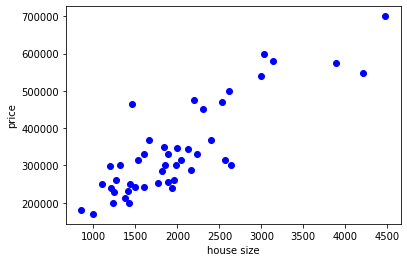

Cost:  [[2.08475311e+09]]
Parameters:  [[ 3.37371711e+05]
 [ 1.04066024e+05]
 [-6.47874139e+01]]


In [8]:
x,y = load_data("house_price_data.txt")
y = np.reshape(y, (46,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)

#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)

We first call the load_data function to load the x and y values. x contains the training examples and y contains the labels (the house prices in our case).<br>
You might have noticed that in the code throughout we have been using matrix multiplication to achieve the expressions we want. For example in order to get the hypothesis, we had to multiply each parameter(θ) with each feature vector(x) we could use for loops for this and loop over each example and perform the multiplication each time however this would not be the most efficient method if we were to have say 10 million training examples. A more efficient approach here would be to use matrix multiplication. If you aren't very familiar with matrix multiplication I would suggest you go over it once, it’s fairly simple. For our dataset we have two features (i.e. the house size and the number of rooms) so we will have (2+1) 3 parameters. The extra parameter θ0 can be accounted for by considering that the hypothesis is nothing but a line in the graphical sense. So the extra θ0 accounts for this line to be as required.<br><center><img src="https://miro.medium.com/max/942/1*H3oA7kT8gQBbWp39mra4eQ.png"><h6>Plot of a favorable hypothesis function</h6></center><br>Okay so we have 3 parameters and 2 features. This means our θ or parameter vector (1-D matrix) will have the dimensions (3,1) but our feature vector will have the dimensions (46,2) {according to our dataset}. You probably have noticed by now that its not mathematically possible to multiply these two matrices. Lets take a look at our hypothesis once again:<br>
<b>hθ(x) = θ0 + θ1x1 + θ2x2</b><br>If you look closely it is actually quite intuitive that if we add an extra column of ones in the beginning of our feature vector(x){ making it have the dimensions (46, 3)} and if we perform matrix multiplication on x and theta we in fact will arrive at the above equation for hθ(x). If it still isn't obvious then just try working out an example on a piece of paper.<br>
Remember when we actually run our code for implementing this function we won’t be returning the expression like for hθ(x) instead we are returning the mathematical value that this expression evaluates to.<br>In the above code the line x = np.hstack((np.ones((x.shape[0],1)), x)) adds an extra column of ones to the beginning of x in order to allow matrix multiplication as required.<br>
After this we initialize our theta vector with zeros. You can also initialize it with some small random values. We also specify the learning rate and the number of epochs (an epoch is the number of times the algorithm will go through the entire dataset) we want to train for.<br>
Once we have all our hyper-parameters defined, we call the gradient descent function which returns a history of all the cost functions and the final vector of parameters theta. This theta vector is essentially what defines our final hypothesis. You may observe that the shape of the theta vector that is returned by the gradient descent function has the dimensions (3,1). Remember our hypothesis function?<br>
<b>hθ(x) = θ0 + θ1x1 + θ2x2</b><br>
Well we needed 3 θs and our theta vector has the dimensions (3,1) hence each of theta[0], theta[1]and theta[2]is in fact θ0, θ1 andθ2 respectively. The J_all variable is nothing but the history of all the cost functions. You can print the J_all array to see how the cost function progressively decreases for each epoch of gradient descent.<br>
<center><img src="https://miro.medium.com/max/930/1*QG9MPVaB-cEJfMhGbTGYxA.png"><h6>Plot of cost vs number of epochs</h6></center><br>This graph can be plotted by defining and calling a plot_cost function like so:

In [9]:
def plot_cost(J_all, num_epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(num_epochs, J_all, 'm', linewidth = "5")
    plt.show()

Now we can use these parameters to find the label i.e. the price of any house (in Portland, Oregon) given the house size and number of rooms.<br>
### Test
You may now test your code calling a test function that will take as input the size of the house, the number of rooms and the final theta vector that was returned by our linear regression model and will give us the price of the house.

In [10]:
def test(theta, x):
    x[0] = (x[0] - mu[0])/std[0]
    x[1] = (x[1] - mu[1])/std[1]

    y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
    print("Price of house: ", y)

### The Complete Code

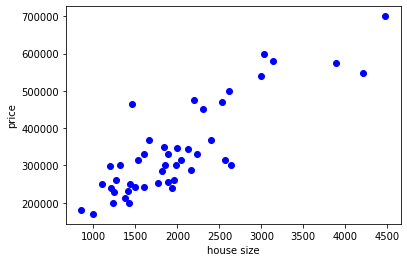

Cost:  [[2.08475311e+09]]
Parameters:  [[ 3.37371711e+05]
 [ 1.04066024e+05]
 [-6.47874139e+01]]


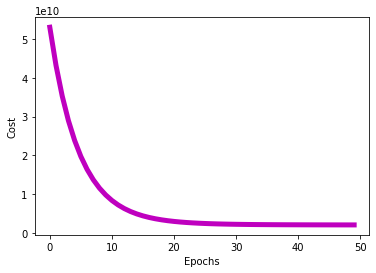

Price of house:  [1.66842816e+08]


In [11]:
#variables to store mean and standard deviation for each feature
mu = []
std = []

def load_data(filename):
    df = pd.read_csv(filename, sep=",", index_col=False)
    df.columns = ["housesize", "rooms", "price"]
    data = np.array(df, dtype=float)
    plot_data(data[:,:2], data[:, -1])
    normalize(data)
    return data[:,:2], data[:, -1]

def plot_data(x, y):
    plt.xlabel('house size')
    plt.ylabel('price')
    plt.plot(x[:,0], y, 'bo')
    plt.show()

def normalize(data):
    for i in range(0,data.shape[1]-1):
        data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
        mu.append(np.mean(data[:,i]))
        std.append(np.std(data[:, i]))


def h(x,theta):
    return np.matmul(x, theta)

def cost_function(x, y, theta):
    return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []

    for _ in range(num_epochs):
        h_x = h(x, theta)
        cost_ = (1/m)*(x.T@(h_x - y))
        theta = theta - (learning_rate)*cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all 

def plot_cost(J_all, num_epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(num_epochs, J_all, 'm', linewidth = "5")
    plt.show()

def test(theta, x):
    x[0] = (x[0] - mu[0])/std[0]
    x[1] = (x[1] - mu[1])/std[1]

    y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
    print("Price of house: ", y)

x,y = load_data("house_price_data.txt")
y = np.reshape(y, (46,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)

#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

test(theta, [1600, 3])

### Linear Regression Using Built In Python Libraries

In [12]:
linear = pd.read_csv('Linear Regression - Sheet1.csv')
linear.head(n=10)

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
5,6,7.222222
6,7,7.888889
7,8,8.555556
8,9,9.222222
9,10,9.888889


In [13]:
linear.describe()

,X,Y
count,300.000000,300.000000
mean,150.500000,102.215556
std,86.746758,57.842711
min,1.000000,1.888889
25%,75.750000,52.388889
50%,150.500000,102.222222
75%,225.250000,152.055556
max,300.000000,201.888889


In [14]:
linear = linear.iloc[:298]

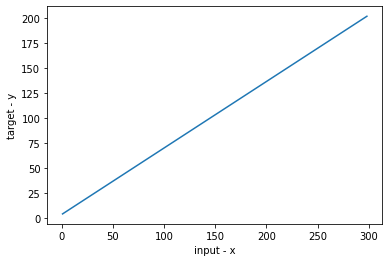

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(linear['X'], linear['Y'])
ax.set_xlabel('input - x')
ax.set_ylabel('target - y')
plt.show()

In [16]:
X = linear[['X']]
y = linear[['Y']]

<AxesSubplot:xlabel='X', ylabel='count'>

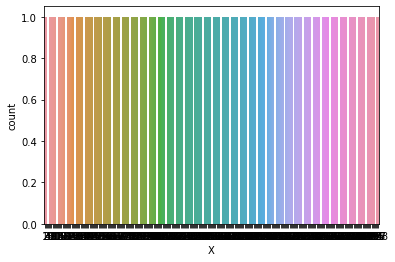

In [17]:
sns.countplot(X['X'])

In [18]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [19]:
model=LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv= 5)
print(scores)

[1. 1. 1. 1. 1.]


In [20]:
model=model.fit(X_train, y_train)
y_pred=model.predict(X_test)

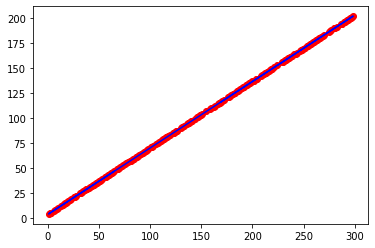

In [21]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,model.predict(X_train),color='blue')

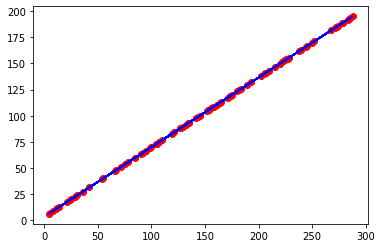

In [22]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,model.predict(X_test),color='blue')

In [23]:
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', MSE)
print('R2 Score: ', r2)

Mean squared error:  3.9695497707818346e-16
R2 Score:  1.0
